# **K Means Algorithm**

The way kmeans algorithm works is as follows:
  Specify number of clusters K.
  Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.
  Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.
  Compute the sum of the squared distance between data points and all centroids.
  Assign each data point to the closest cluster (centroid).
  Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

## Importing Lib

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

## Import the data

In [2]:
df=pd.read_csv('faithful.csv')

In [3]:
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   eruptions   272 non-null    float64
 2   waiting     272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB


In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## EDA

Text(0.5, 1.0, 'Visualization of raw data')

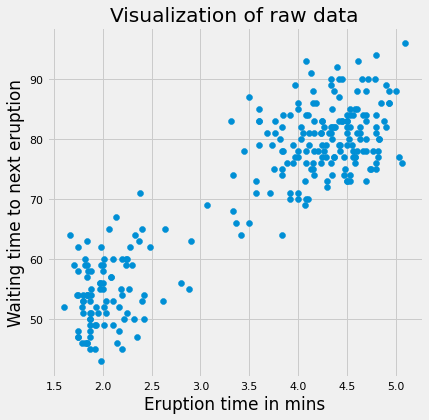

In [12]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df['eruptions'],df['waiting'])
#plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data')

## Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc= StandardScaler()

In [16]:
X_std = sc.fit_transform(df)

## K means 

In [20]:
from sklearn.cluster import KMeans

In [21]:
km= KMeans(n_clusters=2)

In [22]:
km.fit(X_std)

KMeans(n_clusters=2)

In [24]:
centroid= km.cluster_centers_
centroid

array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]])

56.99845675719439


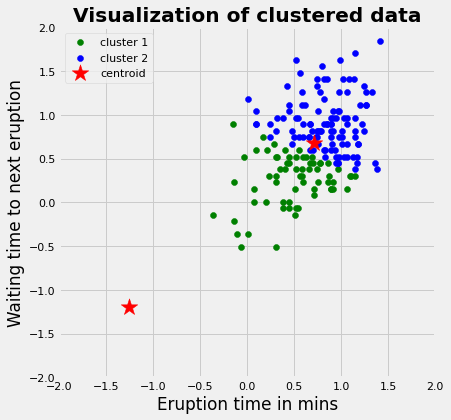

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroid[:, 0], centroid[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')

print(km.inertia_)

43.87095928963708


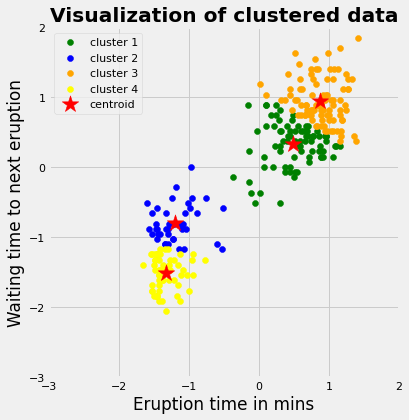

In [30]:
km = KMeans(n_clusters=4) # k = 4
km.fit(X_std)
centroids = km.cluster_centers_
#centroids
km.inertia_ # measures how tight my clusters are -> lower the better (lower => the clusters are more tight)

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='orange', label='cluster 3')
plt.scatter(X_std[km.labels_ == 3, 0], X_std[km.labels_ == 3, 1],
            c='yellow', label='cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='red', label='centroid')
plt.legend()
plt.xlim([-3, 2])
plt.ylim([-3, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');
print(km.inertia_)

## **Impact of initialisation**

41788
11533
85963
77570
86521
87705
22580
73950
42651


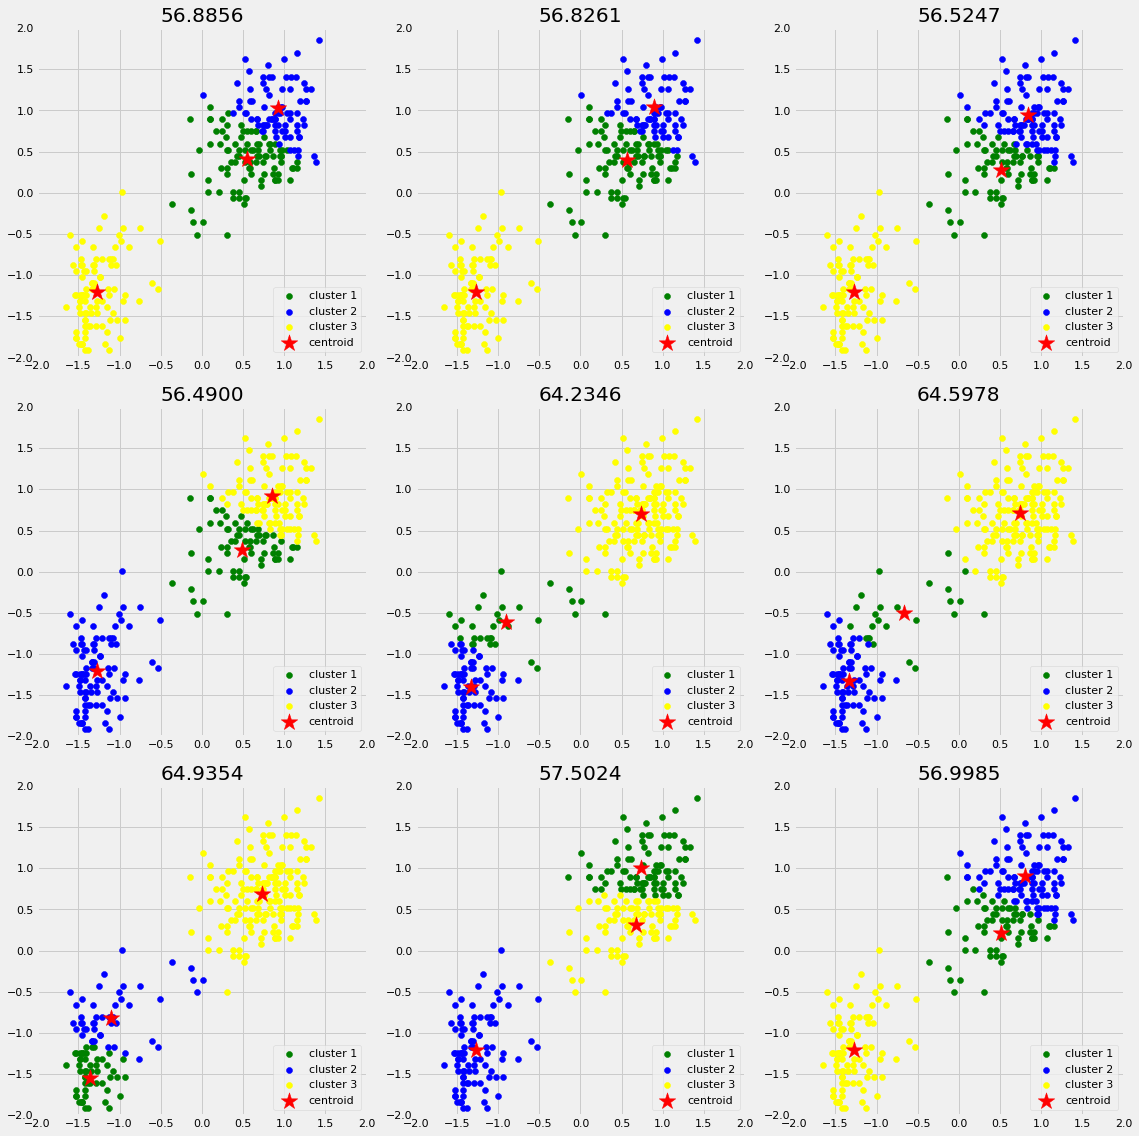

In [28]:
import numpy as np
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    seed = np.random.randint(0, 100000, size=1)[0]
    print(seed)
    km = KMeans(n_clusters=3,max_iter=3,init = 'random',n_init=1,random_state=np.random.RandomState(seed))
    km.fit(X_std)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
                  c='yellow', label='cluster 3')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.inertia_:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout();

## **Determining K**

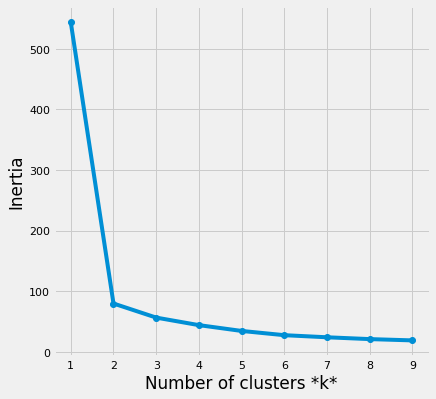

In [31]:
# Elbow plot
# We make a plot between k value and inertia
inertias = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');